In [1]:
import pandas as pd
from pandas import Series, DataFrame
%pylab inline

Populating the interactive namespace from numpy and matplotlib


---
The exam is split as follows:

* Q1: conceptual question worth 24 points.
* Questions 2 to 12 are Pandas questions worth 5 or 6 points each.
* Questions 13 and 14 are about classification, and worth 15 points total.

Best of luck!

---

## [Q1 24 points]

Consider the following dataset, with blue being positive class and red being negative class.
![Example](example1.png "Figure for classification")

### (a) What is the best accuracy that K-Nearest Neighbors can achieve?

### (b) What is the best accuracy that a Decision Tree can achieve?

### (c) What is the best accuracy that Logistic Regression can achieve?

### (d) On which feature will the first split of the Decision Tree be made?

### (e) Suppose we only had Feature 1 and not Feature 2. What accuracy would K-Nearest Neighbors achieve?

### (f) Suppose we only had Feature 2 and not Feature 1. What accuracy would K-Nearest Neighbors achieve?

---
We shall now consider a dataset about Crime complaints in Chicago over a period of several years.

In [2]:
df = pd.read_csv('Crime3.csv', index_col=2, parse_dates=True, infer_datetime_format=True)
df[:2]
df.columns.values

array(['Case Number', 'Block', 'HourOfDay', 'IUCR', 'PrimaryType',
       'Description', 'Location', 'Arrest', 'Domestic', 'dummy'], dtype=object)

## [Q2 5 points] Plot the frequencies of the top 20 most common Primary Types

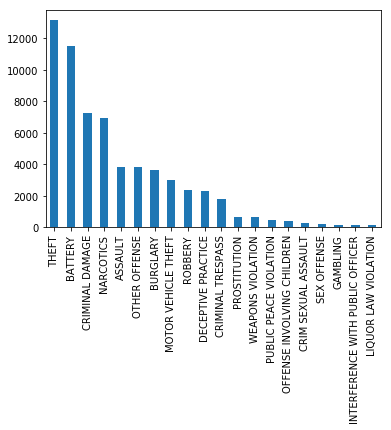

In [3]:
df['PrimaryType'].value_counts()[:20].plot(kind='bar')

## [Q3 5 points] Find the top 10 most common descriptions for Primary Type NARCOTICS

In [4]:
# Create a mask just for primary type narcostics
mask_narcs = (df['PrimaryType'] == 'NARCOTICS')
df3 = df[mask_narcs]

# Value counts on the descriptions
df3['Description'].value_counts()[:10]

POSS: CANNABIS 30GMS OR LESS      2695
POSS: CRACK                       1187
POSS: HEROIN(WHITE)                918
POSS: COCAINE                      256
MANU/DELIVER:CRACK                 249
SOLICIT NARCOTICS ON PUBLICWAY     247
MANU/DELIVER: HEROIN (WHITE)       236
ATTEMPT POSSESSION NARCOTICS       192
POSS: CANNABIS MORE THAN 30GMS     161
FOUND SUSPECT NARCOTICS            147
Name: Description, dtype: int64

## [Q4 5 points] Among incidents that are Domestic and lead to Arrests, what are the top 10 most frequent Primary Types?

In [5]:
# Create a mask for Domestic and Arrests
mask_domestic_arrest = ((df['Domestic'] == 1) & (df['Arrest'] == 1))
df4 = df[mask_domestic_arrest]

# Value counts on the primary types
df4['PrimaryType'].value_counts()[:10]

BATTERY                       1034
OTHER OFFENSE                  170
ASSAULT                        158
CRIMINAL DAMAGE                 84
OFFENSE INVOLVING CHILDREN      46
THEFT                           27
CRIMINAL TRESPASS               20
CRIM SEXUAL ASSAULT              7
SEX OFFENSE                      6
WEAPONS VIOLATION                5
Name: PrimaryType, dtype: int64

## [Q5 6 points] How many descriptions have "POSS:" versus "MANU/DELIVER:"?

Under the Narcotics PrimaryType, there are several Description fields like __POSS: CRACK__, __POSS: COCAINE__, __MANU/DELIVER:CRACK__, __MANU/DELIVER: HEROIN (WHITE)__, etc. We want to count the number of rows that have "POSS:" or "MANU/DELIVER:".

In [6]:
# Create a mask for POSS: and MANU/DELIVER
def poss(e):
    return 'POSS:' in e

def manu(e):
    return 'MANU/DELIVER:' in e

mask_poss = df['Description'].map(poss)
mask_manu = df['Description'].map(manu)

df5a = df[mask_poss]
df5b = df[mask_manu]

print len(df5a)
print len(df5b)

5367
537


## [Q6 6 points] Plot the total number of complaints each month with PrimaryType BATTERY, with the month being the x-axis. Also plot the 12-month moving average of this time series.

First, create a column which is 1 if that particular complaint is about a BATTERY, and 0 otherwise. Now use this column to do the above plots.

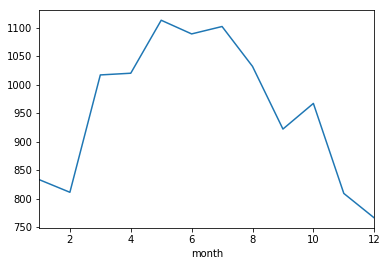

In [7]:
def month(e):
    return e.month

df6 = df.reset_index()
df6['month'] = df6['Date'].map(month)

# create a mask for BATTERY
mask_battery = df6['PrimaryType'] == 'BATTERY'
df6 = df6[mask_battery]

df6.groupby('month')['PrimaryType'].count().plot()

## [Q7 6 points] Plot the frequency of THEFT, BATTERY, and NARCOTICS versus HourOfDay in 3 subplots of 1 figure.

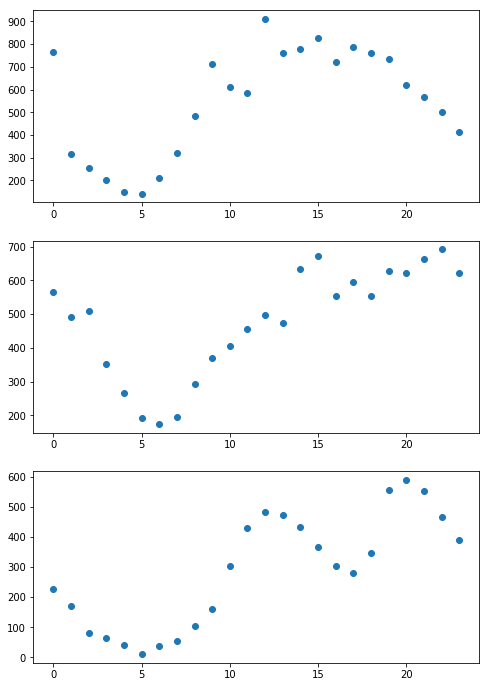

In [15]:
# Create a mask for each PrimaryType
mask_theft = df['PrimaryType'] == 'THEFT'
mask_battery = df['PrimaryType'] == 'BATTERY'
mask_narcs = df['PrimaryType'] == 'NARCOTICS'

df7a = df[mask_theft].groupby('HourOfDay')['PrimaryType'].count()
df7b = df[mask_battery].groupby('HourOfDay')['PrimaryType'].count()
df7c = df[mask_narcs].groupby('HourOfDay')['PrimaryType'].count()

fig, (ax1, ax2, ax3) = subplots(nrows=3, ncols=1, figsize=(8,12))

ax1.plot(df7a.index, df7a.values, marker='o', linestyle='None')
ax2.plot(df7b.index, df7b.values, marker='o', linestyle='None')
ax3.plot(df7c.index, df7c.values, marker='o', linestyle='None')

## [Q8 6 points] Plot the frequency of complaints by street names for the 20 streets with the highest complaints.

If the Block is **024XX W CERMAK RD**, then the street name is **W CERMAK RD**.

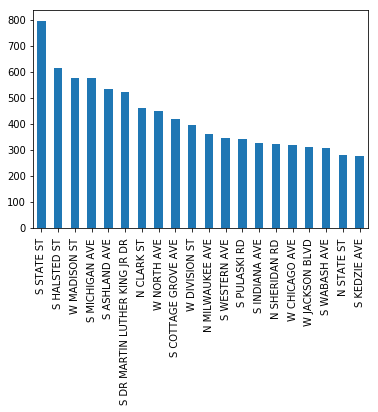

In [22]:
def streetName(e):
    block = e.split(' ')
    return ''.join([x + ' ' for x in block[1:]])

df8 = df
df8['street'] = df8['Block'].map(streetName)

df8['street'].value_counts()[:20].plot(kind='bar')

## [Q9 5 points] Check if each complaint has a unique Case Number.

In [23]:
print len(df['Case Number'])
print len(df['Case Number'].unique())

63008
63008


## [Q10 5 points] How many IUCR codes correspond to a single Primary Type?

In [33]:
df10 = df['IUCR'].value_counts()

mask_iucr = (df10 == 1)
df10 = df10[mask_iucr]
print len(df10)

27


## [Q11 6 points] Among Locations with at least 1000 complaints, what are the most frequent Primary Types?

In [55]:
# Get the location and primary types
df11 = df[['Location', 'PrimaryType']].fillna('')

# Get the locations with at least 1000 complaints
mask_locations = (df11['Location'].value_counts() >= 1000)

def over1000(e):
    return mask_locations[e]

# Create a mask of those locations
mask_in = (df11['Location'].map(over1000))

# Apply the mask and get the most frequent Primary Types
df11[mask_in]['PrimaryType'].value_counts()

BATTERY                              10048
THEFT                                 9269
CRIMINAL DAMAGE                       6339
NARCOTICS                             6110
OTHER OFFENSE                         3477
BURGLARY                              3218
ASSAULT                               3195
MOTOR VEHICLE THEFT                   2852
ROBBERY                               1960
DECEPTIVE PRACTICE                    1404
CRIMINAL TRESPASS                      877
PROSTITUTION                           641
WEAPONS VIOLATION                      558
PUBLIC PEACE VIOLATION                 395
OFFENSE INVOLVING CHILDREN             369
CRIM SEXUAL ASSAULT                    217
SEX OFFENSE                            176
GAMBLING                               119
INTERFERENCE WITH PUBLIC OFFICER       118
ARSON                                   88
LIQUOR LAW VIOLATION                    72
KIDNAPPING                              66
HOMICIDE                                62
STALKING   

## [Q12 6 points] Among all offenses with the word THEFT in the description, select the ones that occur at least 5 times, and sort them in descending order of the fraction of arrests for that offense.

In [60]:
def theft(e):
    return 'THEFT' in e.upper()

# Create a mask for the theft
mask_theft = df['Description'].map(theft)
df12 = df[mask_theft]

# Get the primary types
series_pt_vc = df12['PrimaryType'].value_counts()

# Get Primary Types that occur at least 5 times
mask_pt = (series_pt_vc >= 5)
series_pt_vc[mask_pt]

# Get the total number of arrest for that offense
series_total = df['PrimaryType'].value_counts()

print (series_pt_vc / series_total).dropna().sort_values(ascending=False)

DECEPTIVE PRACTICE     0.275580
THEFT                  0.168264
MOTOR VEHICLE THEFT    0.086379
Name: PrimaryType, dtype: float64


## [Q13 10 points] Use a Logistic Regression classifier to predict Arrest using PrimaryType and Domestic. Split the data into 70% train and 30% test. Report accuracy on the test set. Also report accuracy of the baseline classifier on the test set.

In [68]:
from patsy import dmatrices
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Get the baseline
mask_arrest = (df['Arrest'] == 0)
baseline = float(len(df[mask_arrest])) / float(len(df))
print 'Baseline: ' + str(baseline)

# Create the formula
formula = 'Arrest ~ 0 + PrimaryType + Domestic'

# Get the design matrices
Y, X = dmatrices(formula, df, return_type='dataframe')
y = Y['Arrest'].values

# Split the training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Build the model
model = LogisticRegression()
result = model.fit(X_train, y_train)

# Test on the training 
prediction = model.predict(X_test)
print 'Model: ' + str(metrics.accuracy_score(y_test, prediction))

Baseline: 0.715972574911
Model: 0.8586996773


## [Q14 5 points] Using the results of Logistic Regression above, find the top 5 features that indicate lower chances of Arrest, and the top 5 indicating highest chances of Arrest.

In [72]:
# Get the weights of each feature
weights = Series(model.coef_[0], index=X.columns.values)
print weights.sort_values()[:5]
print
print weights.sort_values(ascending=False)[:5]

PrimaryType[BURGLARY]              -2.709467
PrimaryType[CRIMINAL DAMAGE]       -2.299872
PrimaryType[ROBBERY]               -2.184952
PrimaryType[MOTOR VEHICLE THEFT]   -1.990109
PrimaryType[THEFT]                 -1.861288
dtype: float64

PrimaryType[NARCOTICS]                           5.072023
PrimaryType[PROSTITUTION]                        4.532135
PrimaryType[LIQUOR LAW VIOLATION]                3.463085
PrimaryType[GAMBLING]                            3.404301
PrimaryType[INTERFERENCE WITH PUBLIC OFFICER]    2.250300
dtype: float64
